##### Instructions
- Keep the original structure, you may add additional code cells and/or mark-down cells for clarity, legibility and/or structure.
- Add the required descriptions, explanations, justifications to the mark-down cells. You can find more mark-down tips & tricks online, for example [here](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html) and [here](https://www.ibm.com/docs/en/watson-studio-local/1.2.3?topic=notebooks-markdown-jupyter-cheatsheet)

# EXAM03: Data Science Group Assignment - Iteration 1

**Group name:** Docker commit down -m --build

**Student names & numbers:**
* Iulia Bacanu - 099559
* Shaiza Khatoon - 00099918
* Lars Loois - 101333


---

## 0. Iteration setup

Before importing anything in the File. The first step is to create a virtual enviroment via terminal. The following must be installed in order for the entire assignment to work properly (Excluing hashes)

## On Window's Powershell

In [ ]:
python3 -m venv venv # Create the virtual enviroment
.\venv\Scripts\Activate.ps1 # enter into the enviroment
pip install pandas # installing pandas
pip install scikit-learn # installing scikit

# Install the rest of the libraries by using pip install [library name]

## On MacOS/Linux

In [ ]:
python3 -m venv venv # Create the virtual enviroment
source venv/bin/activate # enter into the enviroment
pip install pandas # installing pandas

# Install the rest of the libraries by using pip install [library name]

**Import libraries**

In [22]:
# CODE CELL: import the necessary libraries for this iteration

import pandas as pd
import matplotlib.pyplot as plt

**Load dataset(s)**

In [5]:
# CODE CELL: import the necessary dataset(s) for this iteration

df = pd.read_csv('Data/ships_inventory_iter1.csv', sep=',')

---

## 1. Business Understanding
*Rubric: LO 6.4D (Reflection on Process)*

**Situation description**

*Describe the Nebula Brokerage pricing problem. Why is their current "gut feeling" approach a risk?.*

*Nebula Brokerage lacks a standardized pricing model. A sector or company would price a ship higher or lower than intended resulting to some a revenue leakage, meaning that they would become underpriced or over priced causing a loss of profit and respectfully a longer selling time.

This specific problem can lead the company to be inconsisntant by managing the other sectors and ships, and can lead to banckrupcy in the near future.*

**Business objective(s)**

*Justify why a data-driven baseline is needed*

*By using a sata-driven baseline to determain the pricings. It will help the company know and identify weather a model has been priced fairly or unfair, making sure that the models stay consistant with the pricing regardless of the sector.*

**Data mining goal(s)**

*Explain what type of modeling task this is and why.*

**Success criteria**

*Determine success criteria for this iteration (the benchmark)*
THe success criteria would be when the system can give the company a good price where customers are satisfied with, the dealer don't have to wait ages to sell a ship and doesn't have a revenue leakage.

By this means the system needs an algorith that will base the price on all availible data in de .csv and need to work by specific rules that are set up by the company


---

## 2. Data Understanding
*Rubric: LO 7.3Q (Visuals) & LO 6.4C (Process)*

**Data exploration**

*Include summary statistics and descriptions of data types below. Describe your findings.*

* Ship_ID = ID number of the ship, integer
* Galactic_Credits = The cost of the ship by galactic credits, integer
* Model_Cycle = the type of model of the ships, more specifically the year of the ship that has been created, float
* Ship_Manufacturer = The company that manufactured the ship, string
* Sector = the location of the ship and where it's being sold, string


In [ ]:
# CODE CELL: Show basic statistics and information
df.info() # Reciving information about the dataframe provided.

**Visualizations and patterns**

*Discover patterns in the data by creating visualizations. Create at least a histogram of Galactic_Credits. Describe your observations.*

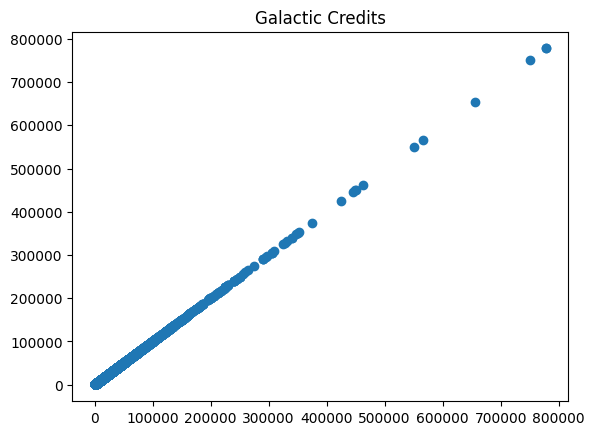

In [7]:
# CODE CELL: Generate visualizations (e.g., scatter plots, histograms)
plt.scatter(x=df['Galactic_Credits'], y=df['Galactic_Credits'])
plt.title('Galactic Credits')
plt.show()

**Data insights and data quality**
* **Insights:** What are the key trends? What does the distribution look like? What does that mean? 
* **Quality issues:** Document missing values, duplicates, outliers, etc.

* **Insights:**

* **Quality issues:** 
- some ships provided lack a model cycle and they are not provided.
- 

---

## 3. Data Preparation
*Rubric: LO 6.4C (Data Science Steps)*

**Cleaning and preprocessing**
*Describe and justify steps taken (e.g., imputation, handling outliers, fixing other errors).*

In [11]:
# CODE CELL: Data cleaning and preprocessing steps


**Adjusting dataset (optional)**
*If you adjusted the dataset for modeling in additional ways, describe that here*

In [6]:
# OPTIONAL CODE CELL: Additional preprocessing steps

---

## 4. Modeling
*Rubric: LO 6.4C (Data Science Steps)*

**Model setup**
*Describe and justify the creation of your simple benchmark model to predict Galactic_Credits*

**Describtion:**
A simple benchmark model has been created to predict the values of Galactic_Credits.\

The benchmark model will predict the mean values of Galactic_Credits for all the data points.

The simple model will be used as a basis to compare the advanced predictive model.

The performance of the model has been evaluated using the Mean Absolute Error (MAE).

Benchmark MAE: 11607.02

The advanced predictive model will not add any predictive value if it does not perform better than this simple model.

Average Galactic Credits: 19453.54
Benchmark MAE: 11607.02


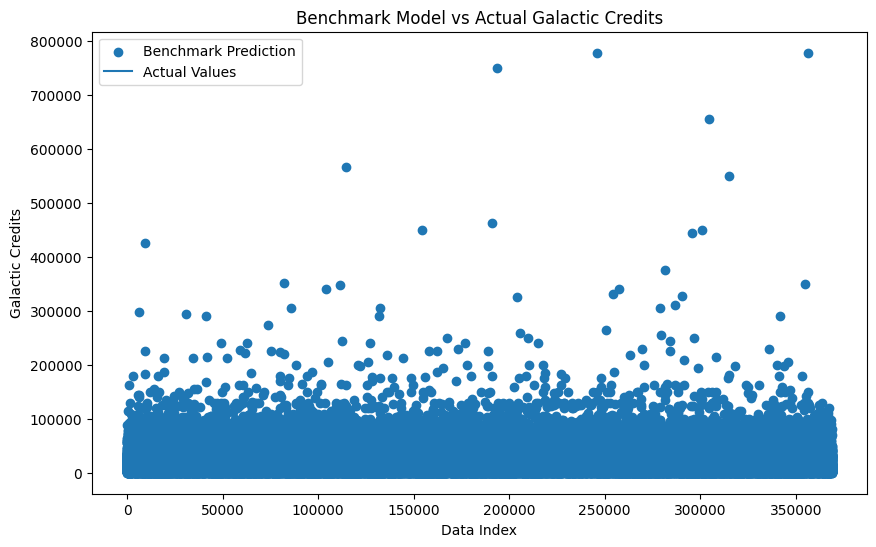

In [6]:
# CODE CELL: Model training and setup code
if "Galactic_Credits" not in df.columns:
    raise ValueError("Can't find column 'Galactic_Credits' in the .CSV.")

mean_credits = df["Galactic_Credits"].mean()

df["Benchmark_Prediction"] = mean_credits

mae = abs(df["Galactic_Credits"] - df["Benchmark_Prediction"]).mean()

print("Average Galactic Credits:", round(mean_credits, 2))
print("Benchmark MAE:", round(mae, 2))

plt.figure(figsize=(10, 6))

plt.scatter(df.index, df["Galactic_Credits"])

plt.plot(df.index, df["Benchmark_Prediction"])

plt.title("Benchmark Model vs Actual Galactic Credits")
plt.xlabel("Data Index")
plt.ylabel("Galactic Credits")
plt.legend(["Benchmark Prediction", "Actual Values"])

plt.show()

**Testing and performance**
*Describe how you tested the model and interpret the metrics. Make sure to present the metrics in a clear overview.*

**Describtion**
To assess the benchmark model, the data was divided into a training dataset (80%) and a test dataset (20%).
The average value of *Galactic_Credits* in the training dataset was set as a fixed prediction for every data point in the test dataset.

The performance of the model was assessed using three different metrics:

- **Mean Absolute Error (MAE)**
- **Mean Squared Error (MSE)**
- **Root Mean Squared Error (RMSE)**

### Performance Results

| Metric | Value |
|--------|--------|
| MAE | 11,639 |
| MSE | 253,859,769 |
| RMSE | 15,932 |

The MAE shows that the average prediction error of the model is 11,639 Galactic Credits.  
The RMSE is higher than the MAE, which shows the presence of large prediction errors (outliers) in the data, as RMSE gives more weight to large errors.

These results show that the benchmark model has a high prediction error. Hence, the benchmark model becomes a baseline that needs to be beaten by more sophisticated models in order to offer any useful predictive gain.

In [10]:
# CODE CELL: Model evaluation 
from sklearn.model_selection import train_test_split
import numpy as np

y = df["Galactic_Credits"]

y_train, y_test = train_test_split(y, test_size=0.2, random_state=42)

mean_train = y_train.mean()

y_pred = np.full(len(y_test), mean_train)

mae = np.mean(np.abs(y_test - y_pred))
mse = np.mean((y_test - y_pred) ** 2)
rmse = np.sqrt(mse)

print("Benchmark Performance:")
print("MAE:", round(mae, 2))
print("MSE:", round(mse, 2))
print("RMSE:", round(rmse, 2))

metrics_df = pd.DataFrame({
    "Metric": ["MAE", "MSE", "RMSE"],
    "Value": [mae, mse, rmse]
})

print(metrics_df)

Benchmark Performance:
MAE: 11639.01
MSE: 253859769.82
RMSE: 15932.98
  Metric         Value
0    MAE  1.163901e+04
1    MSE  2.538598e+08
2   RMSE  1.593298e+04


---

## 5. Evaluation
*Rubric: LO 6.4C (Results vs. Objectives)*

**Assessment against succes criteria** 
*What is the difference between the metrics? What does this mean? Did you meet the goals set in the Business Understanding?*

**Key findings and limitations**
*What did you learn? What are the limitations of this current model?*

---

## 6 Personal Contribution
*Rubric: LO 7.3P (Equal Contribution)*

| Student name | Contribution | Personal lessons learned |
| :--- | :--- | :--- |
| Iulia Bacanu | *Implemented the iteration setup; describing the initial situation; identifying the type of data, creating visualizations* | *How to properly set up an enviroment, importing, and loading files in order to have a working assignment and helping classmates by understanding how to create enviroments; give a bref description of the major problem; diffirentiate the types of data; created the visualizations by imprting the necceserry diagrams * |
| Shaiza Khatoon | *Contribution description* | *Personal lessons learned this iteration* |
| Lars Loois | *Contribution description* | *Personal lessons learned this iteration* |